In [1]:
import numpy as np

from matplotlib import pyplot as plt, style
from ipywidgets import interact

import chugunov_indicator as chug

In [2]:
style.use("default")

In [3]:
def clip(x: np.ndarray, maximum: float = 1.01) -> np.ndarray:
    return np.where(x > maximum, maximum, x)

Consider the data from `1. introduction.ipynb` once more.

In [4]:
kwargs = {
    "abar": 4.028776983649795,
    "zbar": 2.0143884920095214,
    "z2bar": 4.12949645671095,
    "z1": 2,
    "a1": 4,
    "z2": 6,
    "a2": 12
}

In [5]:
D_, T_ = np.logspace(-4, 8, num=100), np.logspace(7, 9.35, num=100)

T, D = np.meshgrid(T_, D_)

In [6]:
F = chug.chugunov_2009(T=T, D=D, **kwargs)

We wish to perform a fit for the border curve of the form
$$
    \rho_b(T) = 10^{-c} T^k \iff \log_{10} \rho_b = k \log_{10} T - c,
$$
where $c$ and $k$ depend on the properties of the composition and the screening pair.

To isolate the line, we consider a narrow band of the form $1.005 < F < 1.01$.

In [7]:
border = (1.005 < F) & (F < 1.01)

Text(0.5, 1.0, 'Border')

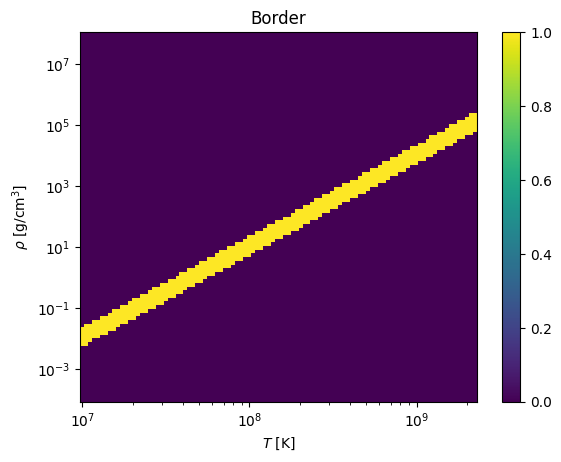

In [8]:
fig0, ax0 = plt.subplots()

cb, cbar = chug.D_T_colorgraph(T, D, border.astype(int), fig0, ax0)

ax0.set_title("Border")

With this, we make the ansatz that $k = 3$, leaving $c$ (the negative $y$-intercept) as the only fit parameter. This gives
$$
    \log_{10} \rho_b = 3 \log_{10} T - c,
$$
which can be rearranged as
$$
    c = 3 \log_{10} T - \log_{10} \rho_b.
$$
From here, we can simply average the right-hand side of the equation to get a least-squares fit for $c$.

In [9]:
log_T, log_D = np.log10(T), np.log10(D)

log_T_border, log_D_border = log_T[border], log_D[border]

In [10]:
diff = 3*log_T_border - log_D_border
c = np.mean(diff)
dc = np.std(diff)

c, dc

(22.957721445221445, 0.18193672311276637)

This gives $c \approx 23$. The uncertainty is quite low, implying that our ansatz $k = 3$ is very accurate. As we will see soon, $k = 3$ and $\sigma_c \ll c$ actually holds for all possible values of $\bar{A}, \bar{Z}, \overline{Z^2}, Z_1, A_1, Z_2, A_2$.

To see the effects of these variables on the result of the fit above, we can create sliders in `matplotlib` and tinker with them to see how it changes:

interactive(children=(FloatSlider(value=26.71982722216236, description='abar', max=52.43965444432472, min=1.0)…

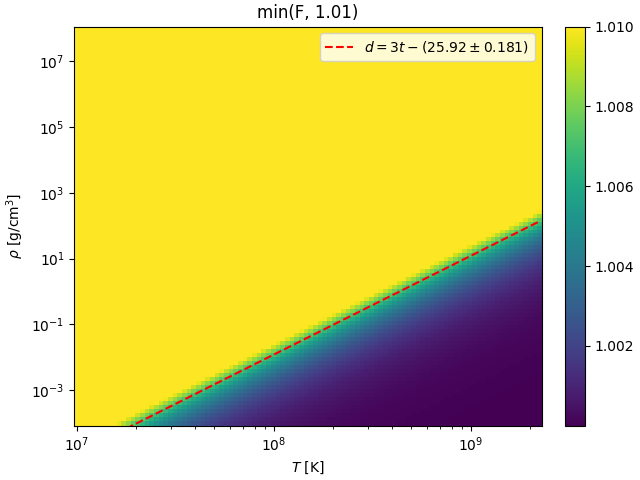

In [16]:
%matplotlib widget

fig1, ax1 = plt.subplots(constrained_layout=True)

chug.D_T_setup(ax1)

ax1.set_title("min(F, 1.01)")

params = {
    "abar": (1, 52.43965444432472),
    "zbar": (1., 200.),
    "z2bar": (1., 713.3104742534674),
    "z1": (1, 20),
    "z2": (1, 20),
    "a1": (1, 100),
    "a2": (1, 100) 
}

# Create initial plots
cb, cbar = chug.graphing.D_T_colorgraph(T, D, clip(F), fig1, ax1)

line, = ax1.plot(T_, np.zeros_like(T_), linestyle="--", color="red")

# Create function to be called when slider value is changed
@interact(**params)
def update(**kwargs) -> None:
    F = chug.chugunov_2009(T, D, **kwargs)
    cb.set_array(clip(F))

    border_new = (1.005 < F) & (F < 1.01)
    log_T_border, log_D_border = log_T[border_new], log_D[border_new]
    
    diff = 3*log_T_border - log_D_border
    c, dc = np.mean(diff), np.std(diff)

    line.set_ydata(1/10**c * T_**3)
    line.set_label(f"$d = 3t - ({c:.2f} \\pm {dc:.3g})$")

    ax1.legend()

# Show graph
#fig1.show()

In [17]:
fig1.savefig("Border Line.svg")

As stated before, it seems that the relations $\sigma_c \ll c$ and $\rho_b \propto T^3$ hold in general.

Based on the above, it would seem that changes in $A_1, A_2$ have no impact on the location of this line. It also slightly moves with $\bar{Z}$, but not significantly enough for us to include it in future fits.

From there, the line's height significantly increases with $\bar{A}$ and significantly decreases with $\overline{Z^2}, Z_1, Z_2$. Note that decreases in the line's height correspond to screening being more important.

Physically, this makes sense - stronger charges $\overline{Z^2}, Z_1, Z_2$ will cause more screening, while a composition with increased mass $\bar{A}$ will resist that screening more easily.